## Warehouse storage allocation problem

A warehouse receives different types of products and must decide:
- Which products to store in which storage zones (each zone has limited capacity)
- How many units of each product to store (subject to demand and space)

### Mathematical formulation

Indices
- i = 1, ..., P: Products
- j = 1, ..., Z: Storage zones

Decision variables
- $y_{ij} = 1$ if any unit of product $i$ is stored in zone $j$, $0$ otherwise
- $x_{ij} \in \mathbb{Z}$: units of product $i$ stored in zone $j$

Parameters
- $C_j$: Capacity of zone $j$
- $D_i$: Demand of product $i$
- $F_{ij}$: Fixed cost of storing product $i$ in storage zone $j$ (independent of the number of units stored)
- $c_{ij}$: Variable cost for storing per unit of product $i$ in storage zone $j$

### Optimization model

Objective function: $\min \sum_{i=1}^P \sum_{j=1}^Z (F_{ij}y_{ij}+c_{ij}x_{ij})$


Constraints

1. Capacity constraint: $\sum_{i=1}^P x_{ij} \leq C_j$, $\forall j$
2. Demand satisfaction: $\sum_{j=1}^Z x_{ij} \geq D_i$

### Numerical example
A warehouse has 3 products and 3 storage zones

<table>
  <tr>
    <th>Product</th>
    <th>Demand</th>
  </tr>
  <tr>
    <td>P1</td>
    <td>40</td>
  </tr>
  <tr>
    <td>P2</td>
    <td>30</td>
  </tr>
  <tr>
    <td>P3</td>
    <td>20</td>
  </tr>
</table>

<table>
  <tr>
    <th>Zone</th>
    <th>Capacity</th>
  </tr>
  <tr>
    <td>Z1</td>
    <td>200</td>
  </tr>
  <tr>
    <td>Z2</td>
    <td>150</td>
  </tr>
  <tr>
    <td>Z3</td>
    <td>180</td>
  </tr>
</table>


Variable per unit cost $c_{ij}$

<table>
  <tr>
    <th></th>
    <th>Z1</th>
    <th>Z2</th>
    <th>Z3</th>
  </tr>
  <tr>
    <td>P1</td>
    <td>2</td>
    <td>3</td>
    <td>2</td>
  </tr>
  <tr>
    <td>P2</td>
    <td>4</td>
    <td>3</td>
    <td>5</td>
  </tr>
  <tr>
    <td>P3</td>
    <td>6</td>
    <td>4</td>
    <td>3</td>
  </tr>
</table>

Fixed assignment cost $F_{ij} = 50$. Each zone can store at most $20$ units of each product.


In [12]:
from qiskit_addon_opt_mapper import OptimizationProblem

# make an empty problem
mod = OptimizationProblem("warehouse_storage_allocation")
print(mod.prettyprint())

Problem name: warehouse_storage_allocation

Minimize
  0

Subject to
  No constraints

  No variables



In [13]:
mod.binary_var_list(keys=3, name="x")
mod.integer_var_list(keys=9, lowerbound=0, name="y", upperbound=20)
print(mod.prettyprint())

Problem name: warehouse_storage_allocation

Minimize
  0

Subject to
  No constraints

  Integer variables (9)
    0 <= y3 <= 20
    0 <= y4 <= 20
    0 <= y5 <= 20
    0 <= y6 <= 20
    0 <= y7 <= 20
    0 <= y8 <= 20
    0 <= y9 <= 20
    0 <= y10 <= 20
    0 <= y11 <= 20

  Binary variables (3)
    x0 x1 x2



In [14]:
mod.minimize(
    #constant=3,
    linear={"x0": 50, "x1": 50, "x2": 50,
            "y3": 2, "y4": 3, "y5": 2,
            "y6": 4, "y7": 3, "y8": 5,
            "y9": 6, "y10": 4, "y11": 3
            }
    )
print(mod.prettyprint())

Problem name: warehouse_storage_allocation

Minimize
  50*x0 + 50*x1 + 50*x2 + 4*y10 + 3*y11 + 2*y3 + 3*y4 + 2*y5 + 4*y6 + 3*y7
  + 5*y8 + 6*y9

Subject to
  No constraints

  Integer variables (9)
    0 <= y3 <= 20
    0 <= y4 <= 20
    0 <= y5 <= 20
    0 <= y6 <= 20
    0 <= y7 <= 20
    0 <= y8 <= 20
    0 <= y9 <= 20
    0 <= y10 <= 20
    0 <= y11 <= 20

  Binary variables (3)
    x0 x1 x2



In [15]:
mod.linear_constraint(linear={"y3": 1, "y6": 1, "y9": 1}, sense="<=", rhs=200)
mod.linear_constraint(linear={"y4": 1, "y7": 1, "y10": 1}, sense="<=", rhs=150)
mod.linear_constraint(linear={"y5": 1, "y8": 1, "y11": 1}, sense="<=", rhs=180)
mod.linear_constraint(linear={"y3": 1, "y4": 1, "y5": 1}, sense=">=", rhs=40)
mod.linear_constraint(linear={"y6": 1, "y7": 1, "y8": 1}, sense=">=", rhs=30)
mod.linear_constraint(linear={"y9": 1, "y10": 1, "y11": 1}, sense=">=", rhs=20)

print(mod.prettyprint())

Problem name: warehouse_storage_allocation

Minimize
  50*x0 + 50*x1 + 50*x2 + 4*y10 + 3*y11 + 2*y3 + 3*y4 + 2*y5 + 4*y6 + 3*y7
  + 5*y8 + 6*y9

Subject to
  Linear constraints (6)
    y3 + y6 + y9 <= 200  'c0'
    y10 + y4 + y7 <= 150  'c1'
    y11 + y5 + y8 <= 180  'c2'
    y3 + y4 + y5 >= 40  'c3'
    y6 + y7 + y8 >= 30  'c4'
    y10 + y11 + y9 >= 20  'c5'

  Integer variables (9)
    0 <= y3 <= 20
    0 <= y4 <= 20
    0 <= y5 <= 20
    0 <= y6 <= 20
    0 <= y7 <= 20
    0 <= y8 <= 20
    0 <= y9 <= 20
    0 <= y10 <= 20
    0 <= y11 <= 20

  Binary variables (3)
    x0 x1 x2



In [16]:
from qiskit_addon_opt_mapper.converters import OptimizationProblemToQubo
converter = OptimizationProblemToQubo(penalty=10)
qubo = converter.convert(mod)
print(qubo.prettyprint())

Problem name: 

Minimize
  10*c0@int_slack@0^2 + 40*c0@int_slack@0*c0@int_slack@1
  + 80*c0@int_slack@0*c0@int_slack@2 + 160*c0@int_slack@0*c0@int_slack@3
  + 320*c0@int_slack@0*c0@int_slack@4 + 640*c0@int_slack@0*c0@int_slack@5
  + 1280*c0@int_slack@0*c0@int_slack@6 + 1460*c0@int_slack@0*c0@int_slack@7
  + 40*c0@int_slack@1^2 + 160*c0@int_slack@1*c0@int_slack@2
  + 320*c0@int_slack@1*c0@int_slack@3 + 640*c0@int_slack@1*c0@int_slack@4
  + 1280*c0@int_slack@1*c0@int_slack@5 + 2560*c0@int_slack@1*c0@int_slack@6
  + 2920*c0@int_slack@1*c0@int_slack@7 + 160*c0@int_slack@2^2
  + 640*c0@int_slack@2*c0@int_slack@3 + 1280*c0@int_slack@2*c0@int_slack@4
  + 2560*c0@int_slack@2*c0@int_slack@5 + 5120*c0@int_slack@2*c0@int_slack@6
  + 5840*c0@int_slack@2*c0@int_slack@7 + 640*c0@int_slack@3^2
  + 2560*c0@int_slack@3*c0@int_slack@4 + 5120*c0@int_slack@3*c0@int_slack@5
  + 10240*c0@int_slack@3*c0@int_slack@6 + 11680*c0@int_slack@3*c0@int_slack@7
  + 2560*c0@int_slack@4^2 + 10240*c0@int_slack@4*c0@int_

In [17]:
hamiltonian = qubo.to_ising()[0]
print(hamiltonian)

SparsePauliOp(['IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZ', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZI', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII

Note that

- this is a general Hamiltonian formulation. This QUBO, or its Hamiltonian formulation, can now be solved using any (quantum / classical) solver.
- should you want to use QAOA as a solver, note that this is a constrained optimization problem. So here the Mixer Hamiltonian cannot be just $\sum_{i=0}^{n-1} X_i$. It must map one valid solution to another valid solution. It is not trivial to come up with such a mixer, and it is often an open area of research. See [1] for some examples of mixer Hamiltonian for some constrained optimization problems.

Here we show that the QAOA ansatz can be created easily by calling the `QAOAAnsatz` method. For this example, we are providing only the problem Hamiltonian, and putting the mixer Hamiltonian to be `None`. But if the mixer Hamiltonian and the initial state are determined for this problem, the entire QAOA circuit can be obtained as

<center>
qaoa = QAOAAnsatz(cost_operator=hamiltonian, mixer_operator=mixer, initial_state=initial_state, reps=reps)
<center>

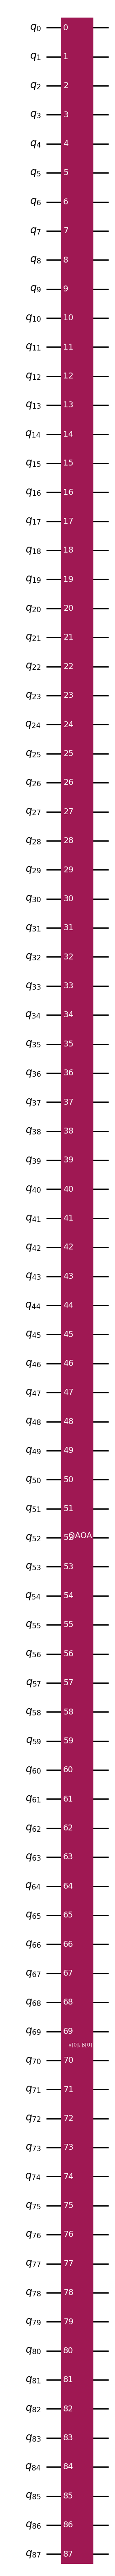

In [25]:
from qiskit.circuit.library import QAOAAnsatz

qaoa = QAOAAnsatz(cost_operator=hamiltonian, mixer_operator=None, reps=1)
qaoa.draw('mpl')


[1] Hadfield, S., Wang, Z., O’gorman, B., Rieffel, E. G., Venturelli, D., & Biswas, R. (2019). From the quantum approximate optimization algorithm to a quantum alternating operator ansatz. Algorithms, 12(2), 34.